## PROYECTO FORMACION INVESTIGATIVA

In [1]:
import tensorflow as tf
import os #manejo de archivos
import skimage.data as imd #sklearn para imagenes
import numpy as np
import datetime #informacion con el tiempo de TF
import matplotlib.pyplot as plt #para graficar
import random #aleatory num
from skimage import transform #para redimensionar las imagenes
from skimage.color import rgb2gray#convertir a espacio de color gris. (hay muchos mas como rojo, verde, azul)

In [2]:
tf.__version__

'2.1.0'

In [3]:
#Funcion para importar los datos
def load_ml_data(data_directory): #recibe la ruta de los datos
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory, d))] #se pasan los items de cada directorio
        
    labels = [] #array de etiquetas para las fotos
    images = [] #el archivo de imagen en si
    for d in dirs:
        label_dir = os.path.join(data_directory, d) #entro a cada carpeta en la lista dirs
        file_names = [os.path.join(label_dir, f) #reviso cada item del directorio SI es un archivo de imagen se guarda
                     for f in os.listdir(label_dir)
                     if f.endswith(".jpg")]
        
        # Recorremos las imagenes
        for f in file_names:
            images.append(imd.imread(f)) #Se lee la imagen y se agrega con el formato de datos para skimage
            labels.append(int(d)) #Numeros enteros para los labels
        
    return images, labels

In [4]:
train_data_dir = 'Training/' #Directorio de entrenamiento
test_data_dir = 'Testing/' #Directorio de test

In [5]:
X_train, Y_train = load_ml_data(train_data_dir)#X_train = imagenes Y_train =labels
X_test, Y_test = load_ml_data(test_data_dir)#X_train = imagenes Y_train =labels

In [6]:
def info_dataset(dataxy):
    print("longitud: ", len(dataxy))
    print("Tipo: ", type(dataxy))
    print("-----")

In [7]:
info_dataset(X_train)#informacion de imagenes train
info_dataset(Y_train)#labels train
info_dataset(X_test)#informacion de imagenes test
info_dataset(Y_test)#labels test

longitud:  147
Tipo:  <class 'list'>
-----
longitud:  147
Tipo:  <class 'list'>
-----
longitud:  77
Tipo:  <class 'list'>
-----
longitud:  77
Tipo:  <class 'list'>
-----


Debo convertir esos datos en "Datasets" o arrays de datos.

In [8]:
X_img_train = np.array(X_train)
Y_lbl_train = np.array(Y_train)
X_img_test = np.array(X_test)
Y_lbl_test = np.array(Y_test) 

In [9]:
print(X_img_train.ndim, Y_lbl_train.ndim) #1 dimension = 1 columna
print(X_img_test.ndim, Y_lbl_test.ndim)
print(X_img_train.size, Y_lbl_train.size)#1 etiqueta para cada imagen
print(X_img_test.size, Y_lbl_test.size)

1 1
1 1
147 147
77 77


In [10]:
X_img_train[0] #primera foto en formato array, las fotos son valores (los colores - 3 canales y arrays corresponden a cada pixel)
#Es un array de arrays

Array([[[ 35,  47,  25],
        [ 36,  48,  26],
        [ 38,  50,  28],
        ...,
        [ 36,  45,  24],
        [ 38,  47,  26],
        [ 40,  49,  28]],

       [[ 35,  49,  26],
        [ 36,  50,  25],
        [ 38,  52,  27],
        ...,
        [ 37,  46,  25],
        [ 38,  47,  26],
        [ 40,  49,  28]],

       [[ 37,  51,  26],
        [ 38,  52,  26],
        [ 40,  54,  28],
        ...,
        [ 37,  46,  27],
        [ 39,  48,  29],
        [ 40,  49,  30]],

       ...,

       [[241, 249, 238],
        [238, 245, 237],
        [236, 241, 234],
        ...,
        [240, 247, 253],
        [241, 248, 254],
        [243, 248, 254]],

       [[240, 250, 239],
        [239, 246, 238],
        [236, 243, 236],
        ...,
        [241, 248, 254],
        [242, 249, 255],
        [244, 249, 255]],

       [[241, 251, 242],
        [237, 247, 239],
        [237, 243, 239],
        ...,
        [242, 249, 255],
        [242, 249, 255],
        [245, 250, 255]]

In [11]:
len(set(Y_lbl_train))#cuantas etiquetas UNICAS hay? set solo cuenta 

7

In [12]:
def info_imagen(imgs):
    print("Datos iniciales de imagen: ", imgs.flags)
    print("Itemsize:", imgs.itemsize)#elementos en cuantos bits?
    print("# de bytes: ", imgs.nbytes)
    print("Bytes que uso:", imgs.nbytes/imgs.itemsize) #las bytes que estoy utilizando

In [13]:
info_imagen(X_img_train)

Datos iniciales de imagen:    C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
Itemsize: 8
# de bytes:  1176
Bytes que uso: 147.0


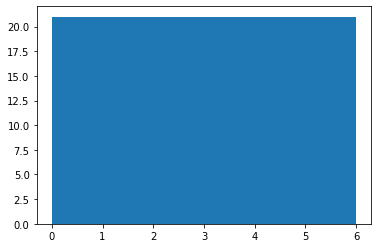

In [14]:
plt.hist(Y_lbl_train, len(set(Y_lbl_train)))
plt.show()

# Resumen visual de las imagenes

In [15]:
rand_signs = random.sample(range(0,len(Y_lbl_train)),6)#quiero una muestra aleatoria simple
rand_signs

[67, 110, 93, 97, 107, 96]

In [16]:
def data_random(random_img,dtset_evaluado): #dataset evaluado recibe el conjunto de imaganes (el completo) sobre el cual vamos a iterar 
    for i in range(len(rand_signs)):
        temp_im = dtset_evaluado[rand_signs[i]] #imagen actual
        plt.subplot(1,6,i+1) #dibujo 6 columnas (6 fotos)
        plt.axis("off")
        plt.imshow(temp_im) #muestro las imagenes
        plt.subplots_adjust(wspace = 0.5) #espacio para que las imagenes no salgan muy pegadas
        plt.show() #mostrar
        print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape, #altura y ancho
                                              temp_im.min(), #pixel con menor color
                                              temp_im.max())) #pixel con mas calor

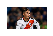

Forma:(354, 630, 3), min:0, max:255


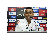

Forma:(992, 1488, 3), min:0, max:255


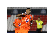

Forma:(462, 700, 3), min:0, max:255


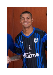

Forma:(409, 264, 3), min:0, max:255


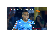

Forma:(362, 620, 3), min:0, max:255


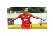

Forma:(450, 800, 3), min:0, max:255


In [17]:
data_random(rand_signs, X_img_train)

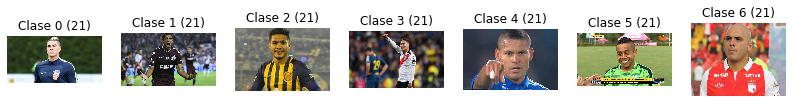

In [18]:
unique_labels = set(Y_lbl_train) #etiquetas unicas
plt.figure(figsize=(16,16)) #tamaño de la figura
i = 1
for label in unique_labels:
    temp_im = X_img_train[list(Y_lbl_train).index(label)] #me quedo con la imagen en la posicion del indice NO en el indice
    #se convierte en lista para poder usar la propiedad index
    #con esa posicion busco la imagen de la cual procede
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(Y_lbl_train).count(label)))
    i +=1 #manejo contador
    plt.imshow(temp_im) #muestro imagen en bucle
plt.show()

# Preprocesado de imagenes previo al ML

## Modelo de red neuronal con Tensorflow

- No todas las imagenes son del mismo tamaño
- Hay 7 clases de imagenes

### Lo que se hara ahora

1. Iniciamos por obtener algunos rasgos de nuestras imagenes
   
   - Las reescalaremos
   - convertimos a escala de grises utilizar el color como regla de decisión
   es poco util, resulta perjudicial para la red neuronal, en la mayoria de
   casos el color no es el principal parametro el nivel de iluminacion
   influye de formas impredecibles hay fotos muy oscuras y fotos con
   muchisima luz.
   - reescalar las imagenes es un problema importante

In [19]:
#se desea conocer el tamaño de imagen mas pequeño que se puede encontrar
w = 9999
h = 9999
for image in X_img_train: #paso por todas las imagenes. El tamaño minimo puede ser combinacion de dos fotos diferentes
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño minimo: {0}x{1}".format(h,w))

Tamaño minimo: 159x199


In [20]:
#doy tamaño 200x200 a todas las imagenes de la carpeta de entrenamiento. las mas pequeñas las hara mas grandes
X_img_train30 = [transform.resize(image,(200,200)) for image in X_img_train]
X_img_train30[0]#los valores cambiaron --> ahora tiene 40000 pixeles

array([[[0.13841176, 0.18627451, 0.0990775 ],
        [0.14811765, 0.19598039, 0.10538515],
        [0.16058824, 0.21012279, 0.11393137],
        ...,
        [0.13539216, 0.17068627, 0.08833333],
        [0.14207843, 0.17737255, 0.09501961],
        [0.15178431, 0.18707843, 0.10472549]],

       [[0.13841176, 0.19090196, 0.09839495],
        [0.14811765, 0.20060784, 0.10511907],
        [0.16058824, 0.21365123, 0.1162451 ],
        ...,
        [0.13539216, 0.17068627, 0.08833333],
        [0.14207843, 0.17737255, 0.09501961],
        [0.15178431, 0.18707843, 0.10472549]],

       [[0.14223529, 0.19713725, 0.09995098],
        [0.15194118, 0.20684314, 0.10689216],
        [0.16441176, 0.22022181, 0.11936275],
        ...,
        [0.13539216, 0.17068627, 0.09215686],
        [0.14377034, 0.17906446, 0.10053505],
        [0.15178431, 0.18707843, 0.10854902]],

       ...,

       [[0.93744583, 0.97108824, 0.93026471],
        [0.92639216, 0.95069044, 0.9223375 ],
        [0.93801348, 0

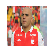

Forma:(200, 200, 3), min:0.04411764705882454, max:0.996078431372549


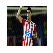

Forma:(200, 200, 3), min:0.0, max:0.9950980392156881


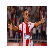

Forma:(200, 200, 3), min:0.0, max:0.9911764705882353


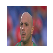

Forma:(200, 200, 3), min:0.07496507352941215, max:0.926303308823529


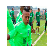

Forma:(200, 200, 3), min:0.0, max:0.996078431372549


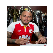

Forma:(200, 200, 3), min:0.0, max:0.9921568627450981


In [21]:
#revisamos nuevamente el tamaño, ahora con el cambio aplicado
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)#genero aleatorio
data_random(rand_signs,X_img_train30)

In [22]:
X_img_train30 = np.array(X_img_train30) #tamaño y tipo de dato correcto para skimage

In [23]:
X_img_train30 = rgb2gray(X_img_train30)

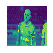

Forma:(200, 200), min:0.028522058823529487, max:0.9802660784313726


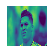

Forma:(200, 200), min:0.0, max:0.9534996200980399


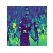

Forma:(200, 200), min:0.03186912071078435, max:0.9410702089460783


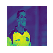

Forma:(200, 200), min:0.0, max:0.9950679215686276


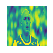

Forma:(200, 200), min:0.039320098039215316, max:0.9944305882352944


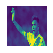

Forma:(200, 200), min:0.016663688235293884, max:0.9927223529411766


In [24]:
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6) #Muestra aleatoria simple
data_random(rand_signs, X_img_train30)

## Creacion de la red neuronal
Se procedera a crear una red neuronal usando tensorflow

## Construccion de la RNA
Modelo basado en Sequential() indica una capa detras de la otra que van a ser rellenadas con capas totalemnte conectadas

- Se van a calcular una detras de la otra en secuencia

Hyper-parametros de la capa:

 - número de unidades/neuronas: 130
 - función de activación: ReLU 0 si el valor el negativo, de lo contrario se queda con el valor actual
 - input_shape: (200,200) esto tiene correspondencia directa con el tamaño de imagen 200*200
 
#### Capa DropOut
Dropout es una técnica de Regularization donde aleatoriamente se asignan a ciertas neuronas de la red el valor cero. De este modo, mientras se entrena, estas neuronas no actualizarán sus valores. Al tener cierto porcentaje de neuronas sin actualizar, el proceso de entrenamiento toma más tiempo pero por contra tenemos menos posibilidades de sufrir overfitting.

- Significa que en el fase de entrenamiento (propagacion hacia atras) los valores no se van a actualizar

- Estaran dormidas, como no se actualizan cierto porcentaje de ellas conservan sus valores iniciales sin retroalimentarse

- Los valores de DropOut tipicamente estan entre 20% y 50%

#### Añadir la segunda capa (capa de salida)
- Unidades: número de clases (7 personas)
- función de activación: 'softmax' (probabilidades de cada clase) devuelve probabilidad de cual (cuan % esta seguro)

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(200,200))) #capa de aplanado que recibe 40000 pixeles 200*200 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid")) #nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=7, activation='softmax'))
#capa de salida, 7 diferentes categorias

## Compilar
- Optimizer: Adam uno de los mejores optimizadores de gradiente descendiente estocastico es el recomendado por defecto
- Loss: Sparse softmax (categorical) crossentropy. Es decir como va a calcular el error entre la prediccion y la categoria rea
- metrics = "sparse_categorical_accuracy", me permite conocer los porcentajes de acierto o eficacia. Como su nombre lo indica me permite medir esto teniendo en cuenta las categorias

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [27]:
model.summary() #resumen de los datos del modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 130)               5200130   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33536     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799      
Total params: 5,235,465
Trainable params: 5,235,465
Non-trainable params: 0
_________________________________________________________________


## Entrenar

In [71]:
model.fit(X_img_train30, Y_lbl_train, epochs=1000)

Train on 147 samples
Epoch 1/1000
147/147 [==============================] - 2s 11ms/sample - loss: 2.1246 - sparse_categorical_accuracy: 0.1769
Epoch 2/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.0149 - sparse_categorical_accuracy: 0.1633
Epoch 3/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.9981 - sparse_categorical_accuracy: 0.1769
Epoch 4/1000
147/147 [==============================] - 0s 2ms/sample - loss: 2.0041 - sparse_categorical_accuracy: 0.1633
Epoch 5/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.9602 - sparse_categorical_accuracy: 0.2109
Epoch 6/1000
147/147 [==============================] - 0s 2ms/sample - loss: 2.0160 - sparse_categorical_accuracy: 0.1837
Epoch 7/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.9623 - sparse_categorical_accuracy: 0.2313
Epoch 8/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.9930 - sparse_categorical_accuracy: 0

Epoch 67/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0257 - sparse_categorical_accuracy: 1.0000
Epoch 68/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0183 - sparse_categorical_accuracy: 1.0000
Epoch 69/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0165 - sparse_categorical_accuracy: 1.0000
Epoch 70/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0174 - sparse_categorical_accuracy: 1.0000
Epoch 71/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0153 - sparse_categorical_accuracy: 1.0000
Epoch 72/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0133 - sparse_categorical_accuracy: 1.0000
Epoch 73/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0127 - sparse_categorical_accuracy: 1.0000
Epoch 74/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0115 - sparse_categorical_accuracy: 1.0000
Epoch 75

147/147 [==============================] - 0s 1ms/sample - loss: 0.0012 - sparse_categorical_accuracy: 1.0000
Epoch 198/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0012 - sparse_categorical_accuracy: 1.0000
Epoch 199/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0012 - sparse_categorical_accuracy: 1.0000
Epoch 200/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0013 - sparse_categorical_accuracy: 1.0000
Epoch 201/1000
147/147 [==============================] - 0s 2ms/sample - loss: 0.0012 - sparse_categorical_accuracy: 1.0000ETA: 0s - loss: 0.0011 - sparse_categorical_accuracy: 1.0000  
Epoch 202/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0014 - sparse_categorical_accuracy: 1.0000
Epoch 203/1000
147/147 [==============================] - 0s 1ms/sample - loss: 0.0012 - sparse_categorical_accuracy: 1.0000
Epoch 204/1000
147/147 [==============================] - 0s 1ms/sample - loss

147/147 [==============================] - 0s 1ms/sample - loss: 4.3161e-04 - sparse_categorical_accuracy: 1.0000
Epoch 324/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.8104e-04 - sparse_categorical_accuracy: 1.0000
Epoch 325/1000
147/147 [==============================] - 0s 1ms/sample - loss: 3.8188e-04 - sparse_categorical_accuracy: 1.0000
Epoch 326/1000
147/147 [==============================] - 0s 1ms/sample - loss: 3.9812e-04 - sparse_categorical_accuracy: 1.0000
Epoch 327/1000
147/147 [==============================] - 0s 1ms/sample - loss: 5.1939e-04 - sparse_categorical_accuracy: 1.0000
Epoch 328/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.2886e-04 - sparse_categorical_accuracy: 1.0000
Epoch 329/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.1678e-04 - sparse_categorical_accuracy: 1.0000
Epoch 330/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.8919e-04 - sparse_categorical_

147/147 [==============================] - 0s 1ms/sample - loss: 2.6530e-04 - sparse_categorical_accuracy: 1.0000
Epoch 450/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.4270e-04 - sparse_categorical_accuracy: 1.0000
Epoch 451/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.3278e-04 - sparse_categorical_accuracy: 1.0000
Epoch 452/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.4962e-04 - sparse_categorical_accuracy: 1.0000
Epoch 453/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.4163e-04 - sparse_categorical_accuracy: 1.0000
Epoch 454/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.3976e-04 - sparse_categorical_accuracy: 1.0000
Epoch 455/1000
147/147 [==============================] - 0s 1ms/sample - loss: 2.9621e-04 - sparse_categorical_accuracy: 1.0000
Epoch 456/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.9719e-04 - sparse_categorical_

147/147 [==============================] - 0s 2ms/sample - loss: 1.1425e-04 - sparse_categorical_accuracy: 1.0000
Epoch 576/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.1432e-04 - sparse_categorical_accuracy: 1.0000
Epoch 577/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.3977e-04 - sparse_categorical_accuracy: 1.0000
Epoch 578/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.7457e-04 - sparse_categorical_accuracy: 1.0000
Epoch 579/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.3218e-04 - sparse_categorical_accuracy: 1.0000
Epoch 580/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.1641e-04 - sparse_categorical_accuracy: 1.0000
Epoch 581/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.3140e-04 - sparse_categorical_accuracy: 1.0000
Epoch 582/1000
147/147 [==============================] - 0s 1ms/sample - loss: 1.7120e-04 - sparse_categorical_

147/147 [==============================] - 0s 1ms/sample - loss: 1.0094e-04 - sparse_categorical_accuracy: 1.0000
Epoch 702/1000
147/147 [==============================] - 0s 2ms/sample - loss: 1.0779e-04 - sparse_categorical_accuracy: 1.0000
Epoch 703/1000
147/147 [==============================] - 0s 1ms/sample - loss: 8.4574e-05 - sparse_categorical_accuracy: 1.0000
Epoch 704/1000
147/147 [==============================] - 0s 1ms/sample - loss: 7.9519e-05 - sparse_categorical_accuracy: 1.0000
Epoch 705/1000
147/147 [==============================] - 0s 1ms/sample - loss: 8.4147e-05 - sparse_categorical_accuracy: 1.0000
Epoch 706/1000
147/147 [==============================] - 0s 1ms/sample - loss: 9.0822e-05 - sparse_categorical_accuracy: 1.0000
Epoch 707/1000
147/147 [==============================] - 0s 1ms/sample - loss: 8.5625e-05 - sparse_categorical_accuracy: 1.0000
Epoch 708/1000
147/147 [==============================] - 0s 1ms/sample - loss: 9.4139e-05 - sparse_categorical_

147/147 [==============================] - 0s 1ms/sample - loss: 6.2069e-05 - sparse_categorical_accuracy: 1.0000
Epoch 828/1000
147/147 [==============================] - 0s 1ms/sample - loss: 7.6663e-05 - sparse_categorical_accuracy: 1.0000
Epoch 829/1000
147/147 [==============================] - 0s 1ms/sample - loss: 7.8975e-05 - sparse_categorical_accuracy: 1.0000
Epoch 830/1000
147/147 [==============================] - 0s 1ms/sample - loss: 8.0787e-05 - sparse_categorical_accuracy: 1.0000
Epoch 831/1000
147/147 [==============================] - 0s 1ms/sample - loss: 8.0248e-05 - sparse_categorical_accuracy: 1.0000
Epoch 832/1000
147/147 [==============================] - 0s 1ms/sample - loss: 7.1830e-05 - sparse_categorical_accuracy: 1.0000
Epoch 833/1000
147/147 [==============================] - 0s 1ms/sample - loss: 5.3377e-05 - sparse_categorical_accuracy: 1.0000
Epoch 834/1000
147/147 [==============================] - 0s 1ms/sample - loss: 5.2656e-05 - sparse_categorical_

147/147 [==============================] - 0s 1ms/sample - loss: 3.9453e-05 - sparse_categorical_accuracy: 1.0000
Epoch 954/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.0345e-05 - sparse_categorical_accuracy: 1.0000
Epoch 955/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.7913e-05 - sparse_categorical_accuracy: 1.0000
Epoch 956/1000
147/147 [==============================] - 0s 1ms/sample - loss: 3.6771e-05 - sparse_categorical_accuracy: 1.0000
Epoch 957/1000
147/147 [==============================] - 0s 1ms/sample - loss: 5.4702e-05 - sparse_categorical_accuracy: 1.0000
Epoch 958/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.0767e-05 - sparse_categorical_accuracy: 1.0000
Epoch 959/1000
147/147 [==============================] - 0s 1ms/sample - loss: 3.8065e-05 - sparse_categorical_accuracy: 1.0000
Epoch 960/1000
147/147 [==============================] - 0s 1ms/sample - loss: 4.1282e-05 - sparse_categorical_

## Evaluar sobre el conjunto de test

NOTA IMPORTANTE Antes de evaluar vamos a tratar las imagenes del dataset de evaluacion. Debemos hacerlas tambien en escala de grises y de 200x200

In [72]:
#doy tamaño 200x200 a todas las imagenes de la carpeta de evaluación. las mas pequeñas las hara mas grandes
X_img_test30 = [transform.resize(image,(200,200)) for image in X_img_test]
X_img_test30 = np.array(X_img_test30) #tamaño y tipo de dato correcto para skimage
X_img_test30 = rgb2gray(X_img_test30)#color gris

La celda anterior ejecuto las tareas necesarias para dejar nuestras imagenes de tamaño 200*200, en escala de grises y en el tipo de archivo indicado para skimage

### Evaluacion sobre el test

In [73]:
test_loss, test_accuracy = model.evaluate(X_img_test30, Y_lbl_test)

77/77 [==============================] - 0s 699us/sample - loss: 5.9798 - sparse_categorical_accuracy: 0.1948


## Predicciones
intentemos realizar predicciones sobre el conjunto de test y veamos que sucede

In [74]:
predicciones = model.predict(X_img_test30)#el modelo ha predecido la clase para cada imagen del set de testing

In [75]:
numA = random.randrange(len(X_img_test30))
numA

10

In [76]:
predicciones[numA]

array([6.5873443e-05, 9.9880862e-01, 2.2113270e-05, 1.2649431e-06,
       1.0130611e-03, 1.3134591e-05, 7.5931443e-05], dtype=float32)

Una prediccion esta formada por el conjunto de todas las probabilidades. En este caso con 7 diferentes etiquetas.

- La mas alta es la elegida. Se puede ver con np.argmax

In [77]:
np.argmax(predicciones[numA]) #devuelve la etiqueta con mas probabilidad (la etiqeuta predecida)

1

In [78]:
Y_lbl_test[numA] #Muestra la etiqueta REAL que tiene esa imagen en nuestro dataset

0

Examinando las etiquetas de test muestra que esta clasificaion es correcta pues el valor devuelto es el mismo tanto en prediccion como en nuestro dataset

- Puede darse el caso de que no coincidan. Recuerda que la red tiene solo un 85% de efectividad

### Graficar
Conjunto aleatorio de 10 imagenes de test para evaluar de forma grafica y comprobar su efectividad

- Ya tengo un array de todo un conjunto de test con las predicciones
  - lo almacene en predicciones, consulta la seccion "predicciones" mas arriba para verlo

Que vamos a hacer?

1. Generar 10 numeros aleatorios en el rango de imagenes de test

2. tomo el valor REAL de mi dataset en la posicion i de "Y_lbl_test" que contiene las etiquetas para conjunto de testing

3. tomo el valor que fue predicho en la posicion i de "predicciones"

4. pinto grafico 4.1 Comparo si ambos valores: verdadero y predicho coinciden y pinto verde o rojo segun corresponde

5. Verde imagenes correctamente clasificadas.

6. Roja: clasificadas erroneamente

In [95]:
ejemplo_idx = random.sample(range(len(X_img_test30)), 16)# numero aleatorios en rango de imagenes

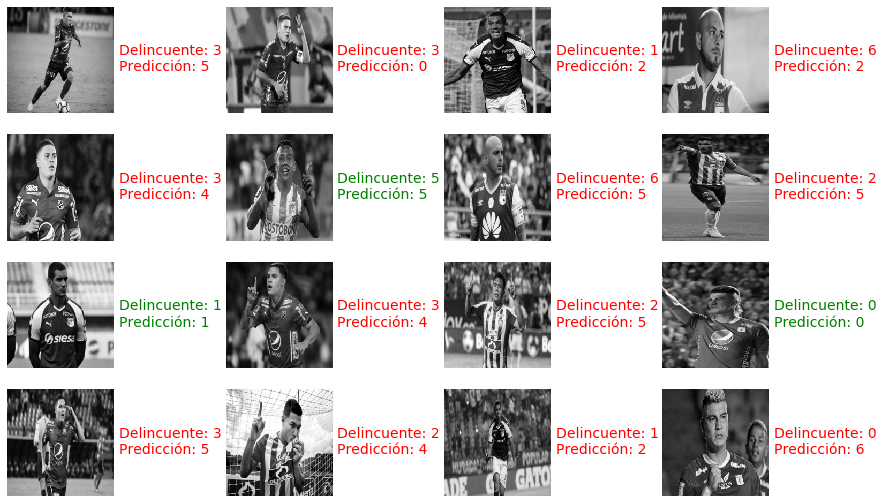

In [96]:
plt.figure(figsize=(15,9))#tamaño de imagen a mostrar
m=1#para controlar lugar sobre el cual dibujar
for i in ejemplo_idx:#en el rango de mis 10 valores generados
    verdadero = Y_lbl_test[i]#la etiqueta real de la imagen predicha (del dataset de etiquetas para testing)
    predicho = np.argmax(predicciones[i])#valor de etiqueta predecido por la RNA
    #print(verdadero, ":", predecido)
    plt.subplot(4,4,m)
    m+=1
    plt.axis("off")
    color = "green" if verdadero == predicho else "red"
    plt.text(210,120, "Delincuente: {0}\nPredicción: {1}".format(verdadero,predicho), fontsize=14, color = color)
    plt.imshow(X_img_test30[i], cmap="gray")
plt.show()